In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import mannwhitneyu, levene

# DISNET

In [2]:
dis_gen = pd.read_csv('./Data/Input/DISNET/dis_genes.tsv', sep='\t')
dis_gen = dis_gen.drop(["Unnamed: 0"],axis=1)

In [3]:
disnet_score = dis_gen["score"]

In [4]:
disnet_score = pd.DataFrame(disnet_score)

In [5]:
dis_gen["score"].mean()

0.13747265487982685

In [6]:
dis_gen["score"].describe()

count    353628.000000
mean          0.137473
std           0.129536
min           0.010000
25%           0.050000
50%           0.100000
75%           0.130000
max           1.000000
Name: score, dtype: float64

# REPODB

In [7]:
cases_repodb_target = pd.read_csv("./Data/Input/DISNET/score_gdas_repodb_target_final.tsv", sep='\t')
cases_repodb_target = cases_repodb_target.drop(["Unnamed: 0"],axis=1)

In [8]:
cases_repodb_target

disease_id        drug_id  gene_id  score disease_new
0      C0007134  CHEMBL1908360     2475   0.50    C0003873
1      C0007134  CHEMBL1908360     2475   0.50    C0004153
2      C0007134  CHEMBL1908360     2475   0.50    C0006413
3      C0007134  CHEMBL1908360     2475   0.50    C0007131
4      C0007134  CHEMBL1908360     2475   0.50    C0007137
...         ...            ...      ...    ...         ...
7769   C0025202     CHEMBL1131     5915   0.02    C0033860
7770   C0025202     CHEMBL1131     6256   0.02    C0033860
7771   C0010674     CHEMBL1520     8654   0.03    C0242350
7772   C0026769  CHEMBL1201563     3454   0.03    C0751967
7773   C0026769  CHEMBL1201563     3455   0.02    C0751967

[7774 rows x 5 columns]

In [9]:
cases_repodb_target["score"].mean()

0.21210059171595477

In [10]:
cases_repodb_target["score"].describe()

count    7774.000000
mean        0.212101
std         0.173242
min         0.020000
25%         0.050000
50%         0.220000
75%         0.340000
max         1.000000
Name: score, dtype: float64

In [11]:
score_gdas_two_repodb = pd.read_csv('./Data/Input/DISNET/score_gdas_two_repodb.tsv', sep='\t')
score_gdas_two_repodb = score_gdas_two_repodb.drop(["Unnamed: 0"],axis=1)

In [12]:
score_gdas_one_repodb = pd.read_csv('./Data/Input/DISNET/score_gdas_one_repodb.tsv', sep='\t')
score_gdas_one_repodb = score_gdas_one_repodb.drop(["Unnamed: 0"],axis=1)

In [13]:
score_gdas_repodb = pd.concat([score_gdas_two_repodb,score_gdas_one_repodb])

In [14]:
score_gdas_repodb["score"].mean()

0.1623303834808263

# CSBJ

In [17]:
cases_csbj_target = pd.read_csv('./Data/Input/DISNET/score_gdas_csbj_target_filtergen.tsv', sep='\t')
cases_csbj_target = cases_csbj_target.drop(["Unnamed: 0"],axis=1)

In [18]:
cases_csbj_target = cases_csbj_target.drop(["Original Condition","New Condition","Drugs"],axis=1)

In [19]:
cases_csbj_target = cases_csbj_target.rename(columns={"New Condition CUI": "disease_new"})

In [20]:
cases_csbj_target["score"].mean()

0.28196850393700795

In [21]:
score_gdas_csbj = pd.read_csv('./Data/Input/DISNET/score_gdas_csbj.tsv', sep='\t')
score_gdas_csbj = score_gdas_csbj.drop(["Unnamed: 0"],axis=1)

In [24]:
score_gdas_csbj["score"].mean()

0.6

# All data  DREBIOP

In [22]:
all_gdas = pd.concat([score_gdas_csbj,score_gdas_repodb])

In [23]:
all_gdas["score"].mean()

0.16361764705882384

In [24]:
all_gdas["score"].describe()

count    340.000000
mean       0.163618
std        0.165744
min        0.020000
25%        0.030000
50%        0.100000
75%        0.300000
max        0.700000
Name: score, dtype: float64

In [25]:
pathways_score = all_gdas["score"]

In [26]:
pathways_score = pd.DataFrame(pathways_score)

In [28]:
all_gdas_target_ = pd.concat([cases_csbj_target,cases_repodb_target])

In [29]:
all_gdas_target_ = all_gdas_target_.drop_duplicates()

# DREGE

In [30]:
all_gdas_target_.to_csv("./Data/Input/DISNET/Triples_target_final.tsv", sep='\t')

In [31]:
target_score = all_gdas_target_["score"]

In [32]:
target_score = pd.DataFrame(target_score)

In [33]:
all_gdas_target_["score"].mean()

0.21280592063287349

In [34]:
all_gdas_target_["score"].describe()

count    7837.000000
mean        0.212806
std         0.173944
min         0.020000
25%         0.050000
50%         0.220000
75%         0.340000
max         1.000000
Name: score, dtype: float64

# Normality Test

In [70]:
 lilliefors(all_gdas_target_["score"], dist ='norm')

(0.21647426452840834, 0.0009999999999998899)

(array([3.745e+03, 1.500e+02, 1.329e+03, 2.175e+03, 1.280e+02, 2.290e+02,
        4.600e+01, 2.300e+01, 1.100e+01, 1.000e+00]),
 array([0.02 , 0.118, 0.216, 0.314, 0.412, 0.51 , 0.608, 0.706, 0.804,
        0.902, 1.   ]),
 <BarContainer object of 10 artists>)

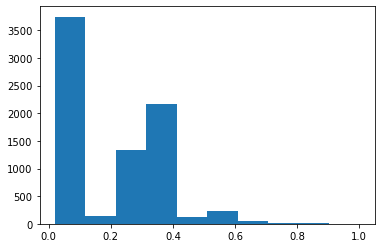

In [71]:
plt.hist(all_gdas_target_["score"])

In [72]:
 lilliefors(all_gdas["score"], dist ='norm')

(0.2729778045817372, 0.0009999999999998899)

(array([154.,  65.,  20.,   2.,  39.,  45.,   1.,   4.,   5.,   5.]),
 array([0.02 , 0.088, 0.156, 0.224, 0.292, 0.36 , 0.428, 0.496, 0.564,
        0.632, 0.7  ]),
 <BarContainer object of 10 artists>)

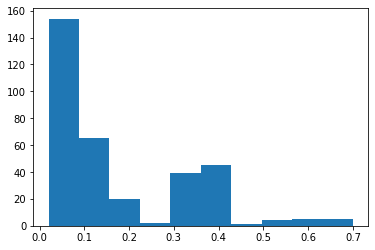

In [73]:
plt.hist(all_gdas["score"])

In [74]:
 lilliefors(dis_gen["score"], dist ='norm')

(0.34968164864294105, 0.0009999999999998899)

(array([260222.,  13748.,  52148.,  17653.,   3423.,   2842.,   1791.,
          1066.,    327.,    408.]),
 array([0.01 , 0.109, 0.208, 0.307, 0.406, 0.505, 0.604, 0.703, 0.802,
        0.901, 1.   ]),
 <BarContainer object of 10 artists>)

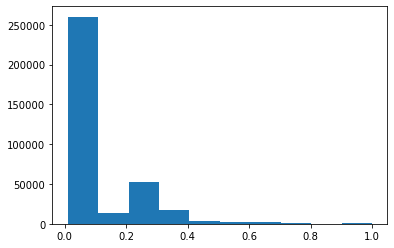

In [75]:
plt.hist(dis_gen["score"])

# MannWhitney-U Test

In [35]:
mannwhitneyu(all_gdas["score"], all_gdas_target_["score"])

MannwhitneyuResult(statistic=1127106.5, pvalue=6.441560639405658e-07)

In [37]:
mannwhitneyu(all_gdas["score"],dis_gen["score"])

MannwhitneyuResult(statistic=59656820.5, pvalue=0.3988562703545171)

# Plots

In [35]:
disnet_score["Drug_repositioning_type"] = "DISNET"

In [36]:
pathways_score["Drug_repositioning_type"] = "DREBIOP"

In [37]:
target_score["Drug_repositioning_type"] = "DREGE"

In [38]:
type_gdas_all = pd.concat([disnet_score,pathways_score,target_score])

In [39]:
type_gdas_all

score Drug_repositioning_type
0      0.10                  DISNET
1      0.10                  DISNET
2      0.10                  DISNET
3      0.10                  DISNET
4      0.10                  DISNET
...     ...                     ...
7769   0.02                   DREGE
7770   0.02                   DREGE
7771   0.03                   DREGE
7772   0.03                   DREGE
7773   0.02                   DREGE

[361805 rows x 2 columns]

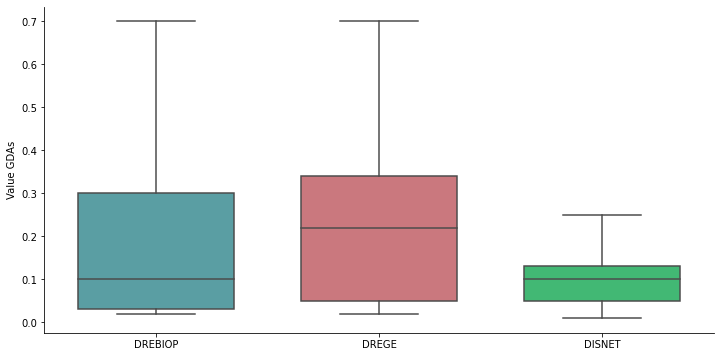

In [41]:
my_colors = ["#4ea8af","#d76b73", "#2ecc71"] 
sns.set_palette( my_colors ) 
fig = plt.figure(figsize=(12, 6))
sns.boxplot(x="Drug_repositioning_type", y="score", data=type_gdas_all, 
            width=0.7, order=["DREBIOP", "DREGE", "DISNET"],
            showfliers = False)
plt.xlabel("")
plt.ylabel("Value GDAs")
sns.despine()
plt.savefig("plot_GDAS.svg")
plt.show()